In [1]:
import pandas as pd
import numpy as np
import linear_model
import imp
imp.reload(linear_model)

import warnings
warnings.filterwarnings(action='ignore')

### 데이터 불러오기

In [2]:
df = pd.read_csv("../data/train.csv")
df.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


### numpy data 구성하기

In [3]:
X = df["x"].values.reshape(-1,1)
X[:3]

array([[24],
       [50],
       [15]], dtype=int64)

In [4]:
y = df["y"].values
y[:3]

array([21.54945196, 47.46446305, 17.21865634])

In [5]:
len(X)

700

In [6]:
one_vector = np.ones( (len(X), 1))
X1 = np.concatenate((one_vector, X), axis = 1)
X1[:3]

array([[ 1., 24.],
       [ 1., 50.],
       [ 1., 15.]])

In [10]:
theta_initial = np.ones(X1.shape[1])
theta = theta_initial
theta

array([1., 1.])

In [11]:
eta0 = 1000

In [14]:
np.dot(X1, theta)[:3]

array([-1362102.91361689, -2778689.94377846,  -871745.86471481])

In [16]:
(np.dot(X1, theta) - y)[:3]

array([-1362124.46306885, -2778737.40824151,  -871763.08337115])

In [17]:
np.dot((np.dot(X1, theta) - y), X1)

array([-1.94484548e+09, -1.29124240e+11])

In [18]:
np.sum( np.dot((np.dot(X1, theta) - y), X1) )

-131069085794.70764

In [40]:
import numpy as np


class LinearRegressionGD(object):
    def __init__(self, fit_intercept=True, copy_X=True,
                 eta0=0.001, epochs=1000, weight_decay=0.9):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self._eta0 = eta0
        self._epochs = epochs

        self._cost_history = []

        self._coef = None
        self._intercept = None
        self._new_X = None
        self._w_history = None
        self._weight_decay = weight_decay

        self._theta_pred = None

    def cost(self, h, y):
        return (1 / (2 * len(y)) ) * np.sum( (h - y)**2 )

    def hypothesis_function(self, X, theta):
        return np.dot(X, theta)

    def gradient(self, X, y, theta):
        return ( 1 / len(y) ) * np.dot( (np.dot(X, theta) - y), X)

    def fit(self, X, y):
        # Write your code
        self._new_X = X
        self._w_history = []

        if self.fit_intercept == True:
            one_vector = np.ones( (len(self._new_X), 1))
            self._new_X = np.concatenate((one_vector, self._new_X), axis = 1)

        theta_initial = np.ones(self._new_X.shape[1])
        
        theta = theta_initial

        for epoch in range(self._epochs):
            # 아래 코드를 반드시 활용할 것
            gradient = self.gradient(self._new_X, y, theta).flatten()

            # Write your code
            theta = theta - self._eta0 * gradient
                
            if epoch % 100 == 0:
                self._w_history.append(theta)
                cost = self.cost(
                    self.hypothesis_function(self._new_X, theta), y)
                self._cost_history.append(cost)

            self._eta0 = self._eta0 * self._weight_decay

        # Write your code
        self._theta_pred = theta
        self._intercept = self._theta_pred[0]
        self._coef = self._theta_pred[1:]
        
        return self

    def predict(self, X):

        if self.fit_intercept == True:
            one_vector = np.ones( (len(X), 1))
            X = np.concatenate( (one_vector, X), axis = 1 )
        
        y_pred = np.dot(X, self._theta_pred)

        return y_pred

    @property
    def coef(self):
        return self._coef

    @property
    def intercept(self):
        return self._intercept

    @property
    def weights_history(self):
        return np.array(self._w_history)

    @property
    def cost_history(self):
        return self._cost_history


In [52]:
( 1 / len(y) ) * np.dot( (np.dot(X1, theta) - y), X1) 

array([-2.77835068e+06, -1.84463200e+08])

In [57]:
X1.shape

(700, 2)

In [53]:
y.shape

(700,)

In [55]:
(np.dot(X1, theta) - y).shape

(700,)

In [59]:
np.dot( (np.dot(X1, theta) - y), X1)

array([-1.94484548e+09, -1.29124240e+11])

In [49]:
( 1 / len(y) ) * np.sum( np.dot( (np.dot(X1, theta) - y), X1) )

-187241551.13529664

In [20]:
lrg = linear_model.LinearRegressionGD(eta0=0.0001, epochs=500000, weight_decay=1)

In [21]:
lrg.fit(X, y)

In [22]:
lrg.intercept

array([0.98414547])

In [23]:
lrg.coef

0.9841454685509105

In [24]:
lrg.predict(X)[:10]

array([24.60363671, 50.1914189 , 15.7463275 , 38.38167327, 86.60480123,
       36.41338234, 12.79389109, 80.69992842, 25.58778218,  5.90487281])

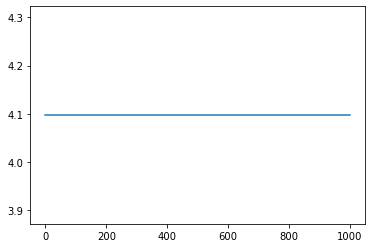

In [25]:
import matplotlib.pyplot as plt
plt.plot(lrg.cost_history[1000:2000])
plt.show()

In [27]:
df_test = pd.read_csv('../data/test.csv')
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [32]:
X_test = df_test['x'].values.reshape(-1,1)
y_test = df_test['y'].values

In [34]:
X_test[:3]

array([[77],
       [21],
       [22]], dtype=int64)